In [1]:
from __future__ import print_function
from phylogeny6 import *
%matplotlib inline 

Using CPU



## True random tree

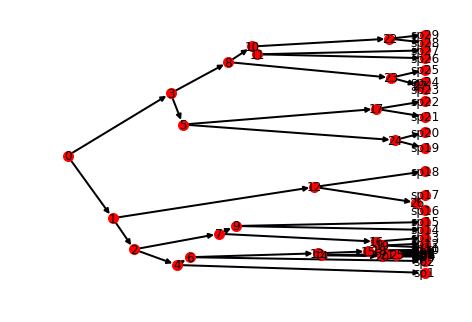

In [2]:
np.random.seed(16)
Gtrue = genRandEvolTree(totalTime=1., genomesize=1000, splitRate=2., mutationRate=0.1)
plot(Gtrue, nonuniformSpecies=True, show=False);

## Initial approximation

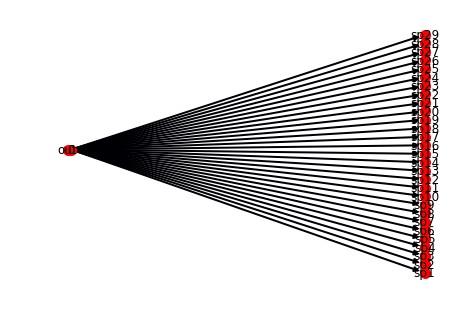

In [3]:
    speciesNames = Gtrue.speciesNames
    speciesData = np.array([Gtrue.nodes[species]['genome'] for species in speciesNames])
    
    G = getGraph(speciesData, speciesNames, verbose=False)     
    plot(G);

### List all optimized weights

In [4]:
serialize(G, printout=True)

nodes[0][t]: -1.0
edges[(0,sp1)][w] 1.0
edges[(0,sp2)][w] 1.0
edges[(0,sp3)][w] 1.0
edges[(0,sp4)][w] 1.0
edges[(0,sp5)][w] 1.0
edges[(0,sp6)][w] 1.0
edges[(0,sp7)][w] 1.0
edges[(0,sp8)][w] 1.0
edges[(0,sp9)][w] 1.0
edges[(0,sp10)][w] 1.0
edges[(0,sp11)][w] 1.0
edges[(0,sp12)][w] 1.0
edges[(0,sp13)][w] 1.0
edges[(0,sp14)][w] 1.0
edges[(0,sp15)][w] 1.0
edges[(0,sp16)][w] 1.0
edges[(0,sp17)][w] 1.0
edges[(0,sp18)][w] 1.0
edges[(0,sp19)][w] 1.0
edges[(0,sp20)][w] 1.0
edges[(0,sp21)][w] 1.0
edges[(0,sp22)][w] 1.0
edges[(0,sp23)][w] 1.0
edges[(0,sp24)][w] 1.0
edges[(0,sp25)][w] 1.0
edges[(0,sp26)][w] 1.0
edges[(0,sp27)][w] 1.0
edges[(0,sp28)][w] 1.0
edges[(0,sp29)][w] 1.0


### Individual weights

In [5]:
print(G.nodes[0]['t'])
print(G.nodes['sp1']['t'])
print(G.edges[(0,'sp1')]['w'])

tensor(-1., requires_grad=True)
tensor(0.)
tensor(1., requires_grad=True)


### Current value of objective function (likelihood)

In [6]:
print(getObj(G))

tensor(7.3411, grad_fn=<MeanBackward0>)


## Optimize initial branching time 

In [7]:
for s in range(30):
    updateGD(G, lRate0=1., verbose=False)

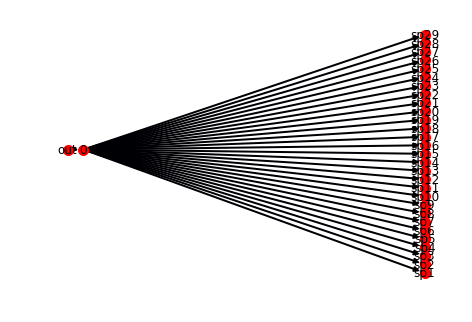

In [8]:
plot(G);

### New values of objective and time of initial branching

In [9]:
print('Likelihood:', getObj(G))
print('Time of first split:', G.nodes[0]['t'])

Likelihood: tensor(13.4135, grad_fn=<MeanBackward0>)
Time of first split: tensor(-0.2146, requires_grad=True)


## First split

Likelihood: tensor(13.6316, grad_fn=<MeanBackward0>)


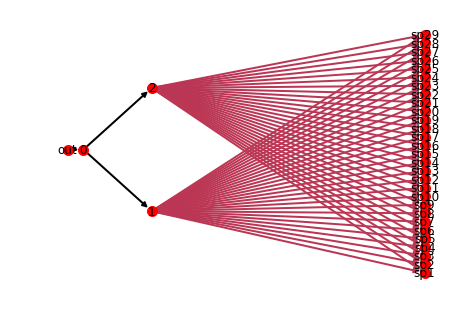

In [10]:
split(G, rand=1e-5)
print('Likelihood:', getObj(G))
plot(G);

## Run GD

In [11]:
for s in range(15):
    updateGD(G) 

Likelihood: tensor(14.5512, grad_fn=<MeanBackward0>)


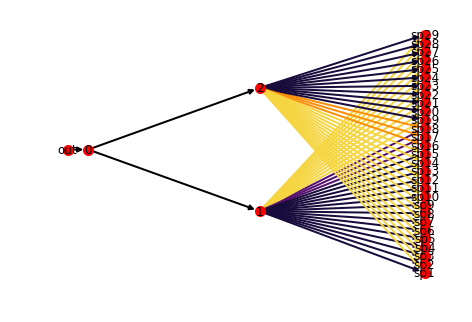

In [12]:
print('Likelihood:', getObj(G))
plot(G);

## Second split

Likelihood: tensor(14.4971, grad_fn=<MeanBackward0>)


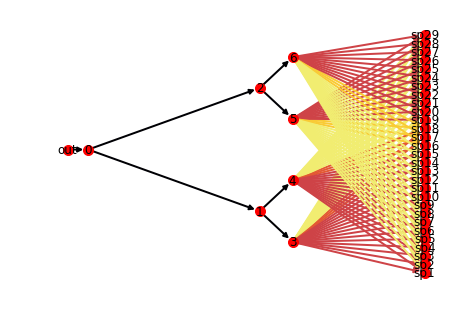

In [13]:
split(G, rand=1e-5)
print('Likelihood:', getObj(G))
plot(G);

## Again GD

In [14]:
for s in range(15):
    updateGD(G) 

Likelihood: tensor(14.9222, grad_fn=<MeanBackward0>)


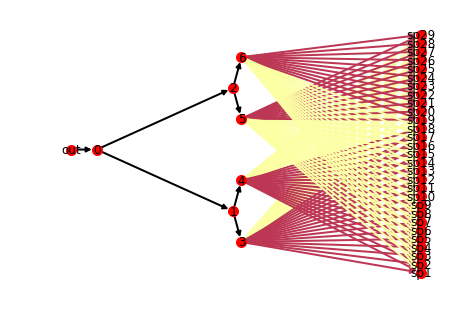

In [15]:
print('Likelihood:', getObj(G))
plot(G);

## Strip weak edges

Likelihood: tensor(14.9465, grad_fn=<MeanBackward0>)


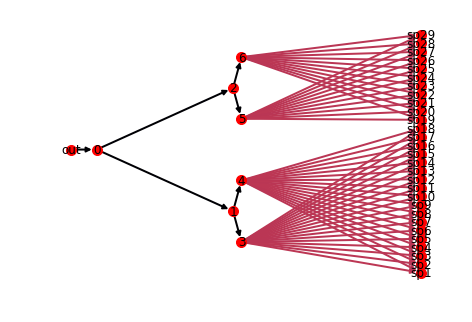

In [16]:
strip(G, threshold=0.1)
print('Likelihood:', getObj(G))
plot(G);

## Strip unneeded nodes and redraw

Likelihood: tensor(14.9465, grad_fn=<MeanBackward0>)


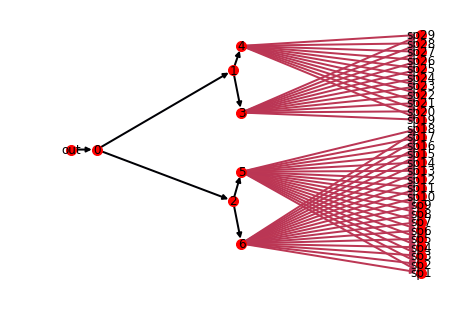

In [17]:
stripNodes(G)
optPosPlot(G)
print('Likelihood:', getObj(G))
plot(G);

Likelihood: tensor(14.8703, grad_fn=<MeanBackward0>)


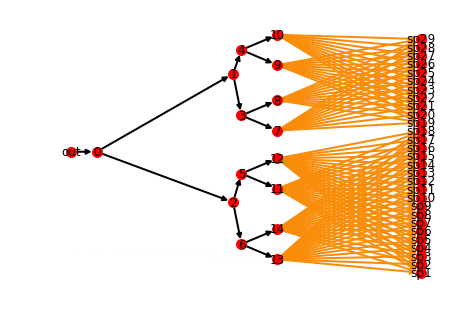

In [18]:
split(G, rand=1e-5)
print('Likelihood:', getObj(G))
plot(G);

In [19]:
for s in range(15):
    updateGD(G) 

Likelihood: tensor(15.3620, grad_fn=<MeanBackward0>)


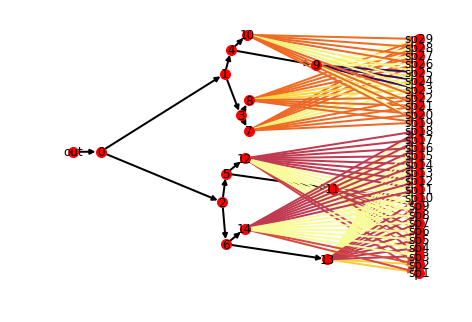

In [20]:
print('Likelihood:', getObj(G))
plot(G);

Likelihood: tensor(15.3186, grad_fn=<MeanBackward0>)


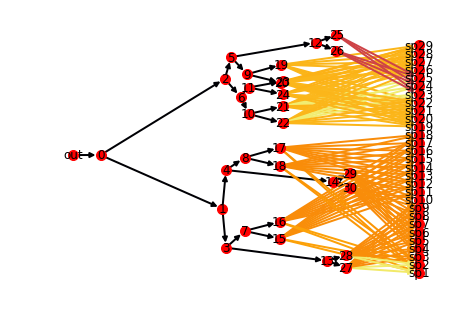

In [21]:
strip(G, threshold=0.1)
stripNodes(G)
split(G, rand=1e-5)
optPosPlot(G)
print('Likelihood:', getObj(G))
plot(G);

Likelihood: tensor(15.6897, grad_fn=<MeanBackward0>)


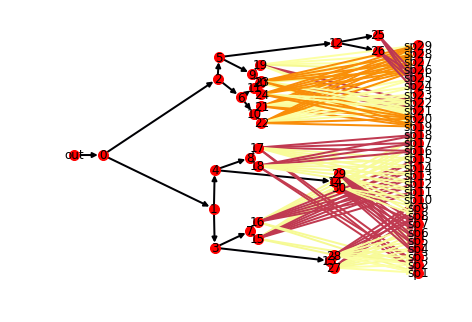

In [22]:
for s in range(15):
    updateGD(G)
print('Likelihood:', getObj(G))
plot(G);

Likelihood: tensor(15.7269, grad_fn=<MeanBackward0>)


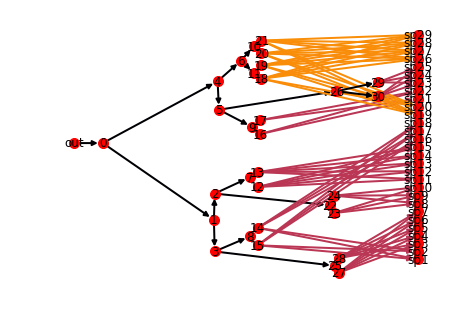

In [23]:
strip(G, threshold=0.1)
stripNodes(G)
optPosPlot(G)
print('Likelihood:', getObj(G))
plot(G);

### Try to relax connection at close neighboring nodes 

Relaxed edges: 1
Likelihood: tensor(15.7186, grad_fn=<MeanBackward0>)


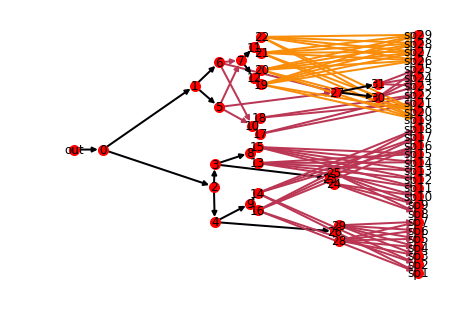

In [24]:
nRelaxed = relaxClose(G)
print ('Relaxed edges:', nRelaxed)
print('Likelihood:', getObj(G))
optPosPlot(G)
plot(G);

Likelihood: tensor(16.0261, grad_fn=<MeanBackward0>)


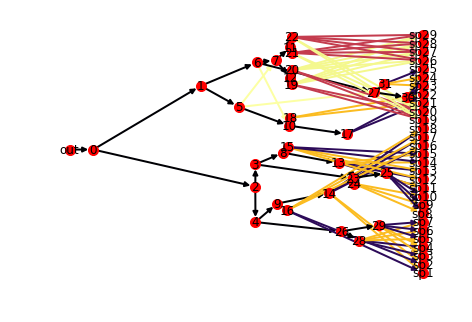

In [25]:
for s in range(15):
    updateGD(G)
print('Likelihood:', getObj(G))
plot(G);

### Let's make actual tree by keeping only strongest edges 

Likelihood: tensor(16.3218, grad_fn=<MeanBackward0>)


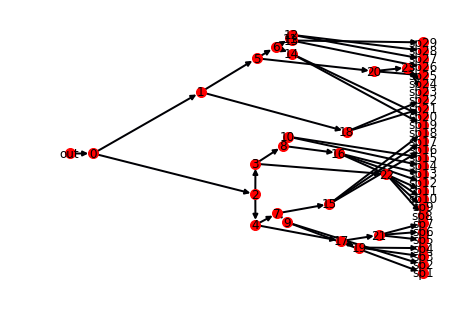

In [26]:
strip(G, threshold=1.)
stripNodes(G)
optPosPlot(G)
print('Likelihood:', getObj(G))
plot(G);

### Some more GD iterations

Likelihood: tensor(16.4774, grad_fn=<MeanBackward0>)


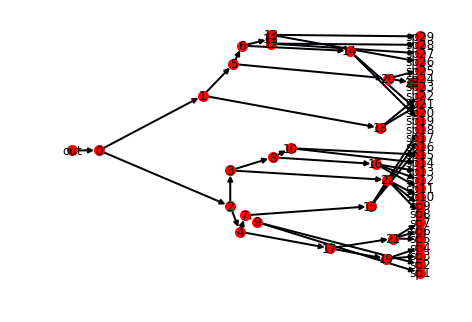

In [27]:
for s in range(15):
    updateGD(G)
optPosPlot(G)
print('Likelihood:', getObj(G))
plot(G);

### Again, let's try relaxation

Relaxed edges: 1
Likelihood: tensor(16.4677, grad_fn=<MeanBackward0>)
Relaxed edges: 1
Likelihood: tensor(16.4629, grad_fn=<MeanBackward0>)
Relaxed edges: 1
Likelihood: tensor(16.4567, grad_fn=<MeanBackward0>)
Relaxed edges: 1
Likelihood: tensor(16.4554, grad_fn=<MeanBackward0>)
Relaxed edges: 1
Likelihood: tensor(16.4384, grad_fn=<MeanBackward0>)
Relaxed edges: 0
Likelihood: tensor(16.4384, grad_fn=<MeanBackward0>)


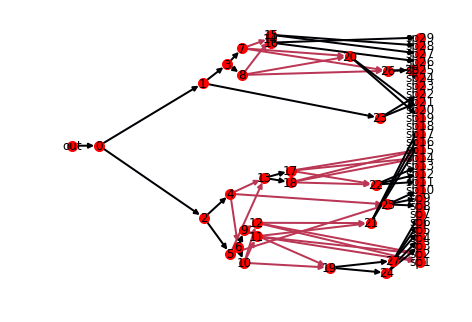

In [28]:
nRelaxed = 1
while nRelaxed > 0:
    nRelaxed = relaxClose(G)
    print ('Relaxed edges:', nRelaxed)
    print('Likelihood:', getObj(G))
optPosPlot(G)
plot(G);

Likelihood: tensor(16.5090, grad_fn=<MeanBackward0>)


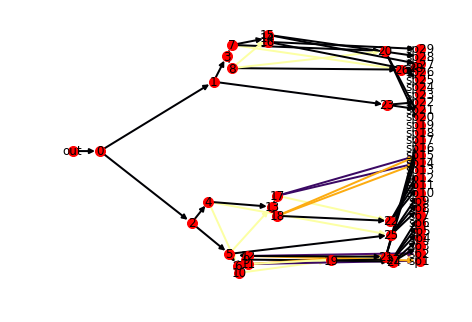

In [29]:
for s in range(15):
    updateGD(G)
optPosPlot(G)
print('Likelihood:', getObj(G))
plot(G);

## Finalization and comparison

In [30]:
strip(G, threshold=1.)
stripNodes(G)
optPosPlot(G)
print('Likelihood:', getObj(G))

Likelihood: tensor(16.5135, grad_fn=<MeanBackward0>)


Estimated:


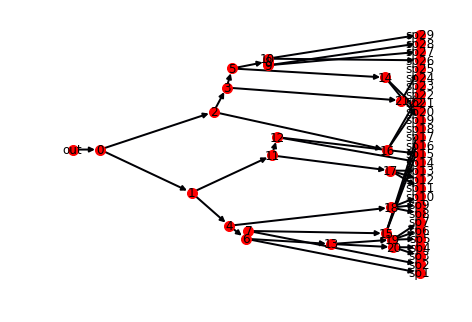

True:


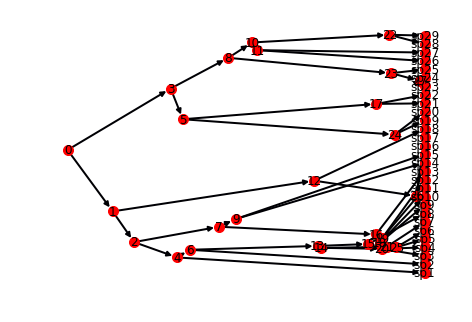

In [31]:
print ('Estimated:')
plot(G);
print ('True:')
plot(Gtrue, nonuniformSpecies=False);